In [3]:
import pandas as pd

file_path = '../../data/student-graduation/graduation_dataset.csv'
data = pd.read_csv(file_path)

data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [17]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load dataset
file_path = '../../data/student-graduation/graduation_dataset.csv'
data = pd.read_csv(file_path)

# Step 1: Data Exploration
# Display initial rows and summary statistics
print("First five rows of the dataset:")
print(data.head())
print("\nSummary statistics for numerical columns:")
print(data.describe())
print("\nData types and missing values:")
print(data.info())

# Identifying unique values in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {data[col].unique()}")

# Step 2: Data Cleaning
# a. Handling Missing Values
# Numerical columns: Impute with mean
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='mean')
data[num_cols] = num_imputer.fit_transform(data[num_cols])

# Categorical columns: Impute with most frequent (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = cat_imputer.fit_transform(data[categorical_columns])

# Check for remaining missing values
print("\nMissing values after imputation:")
print(data.isnull().sum())

# Step 3: Data Transformation
# a. Encoding Categorical Data
# Apply Label Encoding or One-Hot Encoding based on the unique values
encoded_data = data.copy()
for col in categorical_columns:
    if data[col].nunique() <= 10:
        # One-Hot Encoding for columns with fewer unique values
        encoded_data = pd.get_dummies(encoded_data, columns=[col], drop_first=True)
    else:
        # Label Encoding for columns with many unique values
        le = LabelEncoder()
        encoded_data[col] = le.fit_transform(data[col])


# b. Feature Scaling
# Applying Min-Max Scaling to normalize the features
scaler = MinMaxScaler()
encoded_data[num_cols] = scaler.fit_transform(encoded_data[num_cols])

# Step 4: Data Splitting
# Split the data into training and testing sets
X = encoded_data.drop(columns=['Target_Graduate'])  
y = encoded_data['Target_Graduate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nPreprocessing complete.")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

data.head()


First five rows of the dataset:
   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6 

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,8.0,5.0,2.0,1.0,1.0,1.0,13.0,10.0,6.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,Dropout
1,1.0,6.0,1.0,11.0,1.0,1.0,1.0,1.0,3.0,4.0,...,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79,Graduate
2,1.0,1.0,5.0,5.0,1.0,1.0,1.0,22.0,27.0,10.0,...,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,Dropout
3,1.0,8.0,2.0,15.0,1.0,1.0,1.0,23.0,27.0,6.0,...,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12,Graduate
4,2.0,12.0,1.0,3.0,0.0,1.0,1.0,22.0,28.0,10.0,...,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79,Graduate


Marital status: 505 outliers detected
Application order: 541 outliers detected
Daytime/evening attendance: 483 outliers detected
Previous qualification: 707 outliers detected
Nacionality: 110 outliers detected
Mother's occupation: 84 outliers detected
Father's occupation: 84 outliers detected
Educational special needs: 51 outliers detected
Debtor: 503 outliers detected
Tuition fees up to date: 528 outliers detected
Scholarship holder: 1099 outliers detected
Age at enrollment: 441 outliers detected
International: 110 outliers detected
Curricular units 1st sem (credited): 577 outliers detected
Curricular units 1st sem (enrolled): 424 outliers detected
Curricular units 1st sem (evaluations): 158 outliers detected
Curricular units 1st sem (approved): 180 outliers detected
Curricular units 1st sem (grade): 726 outliers detected
Curricular units 1st sem (without evaluations): 294 outliers detected
Curricular units 2nd sem (credited): 530 outliers detected
Curricular units 2nd sem (enrolled):

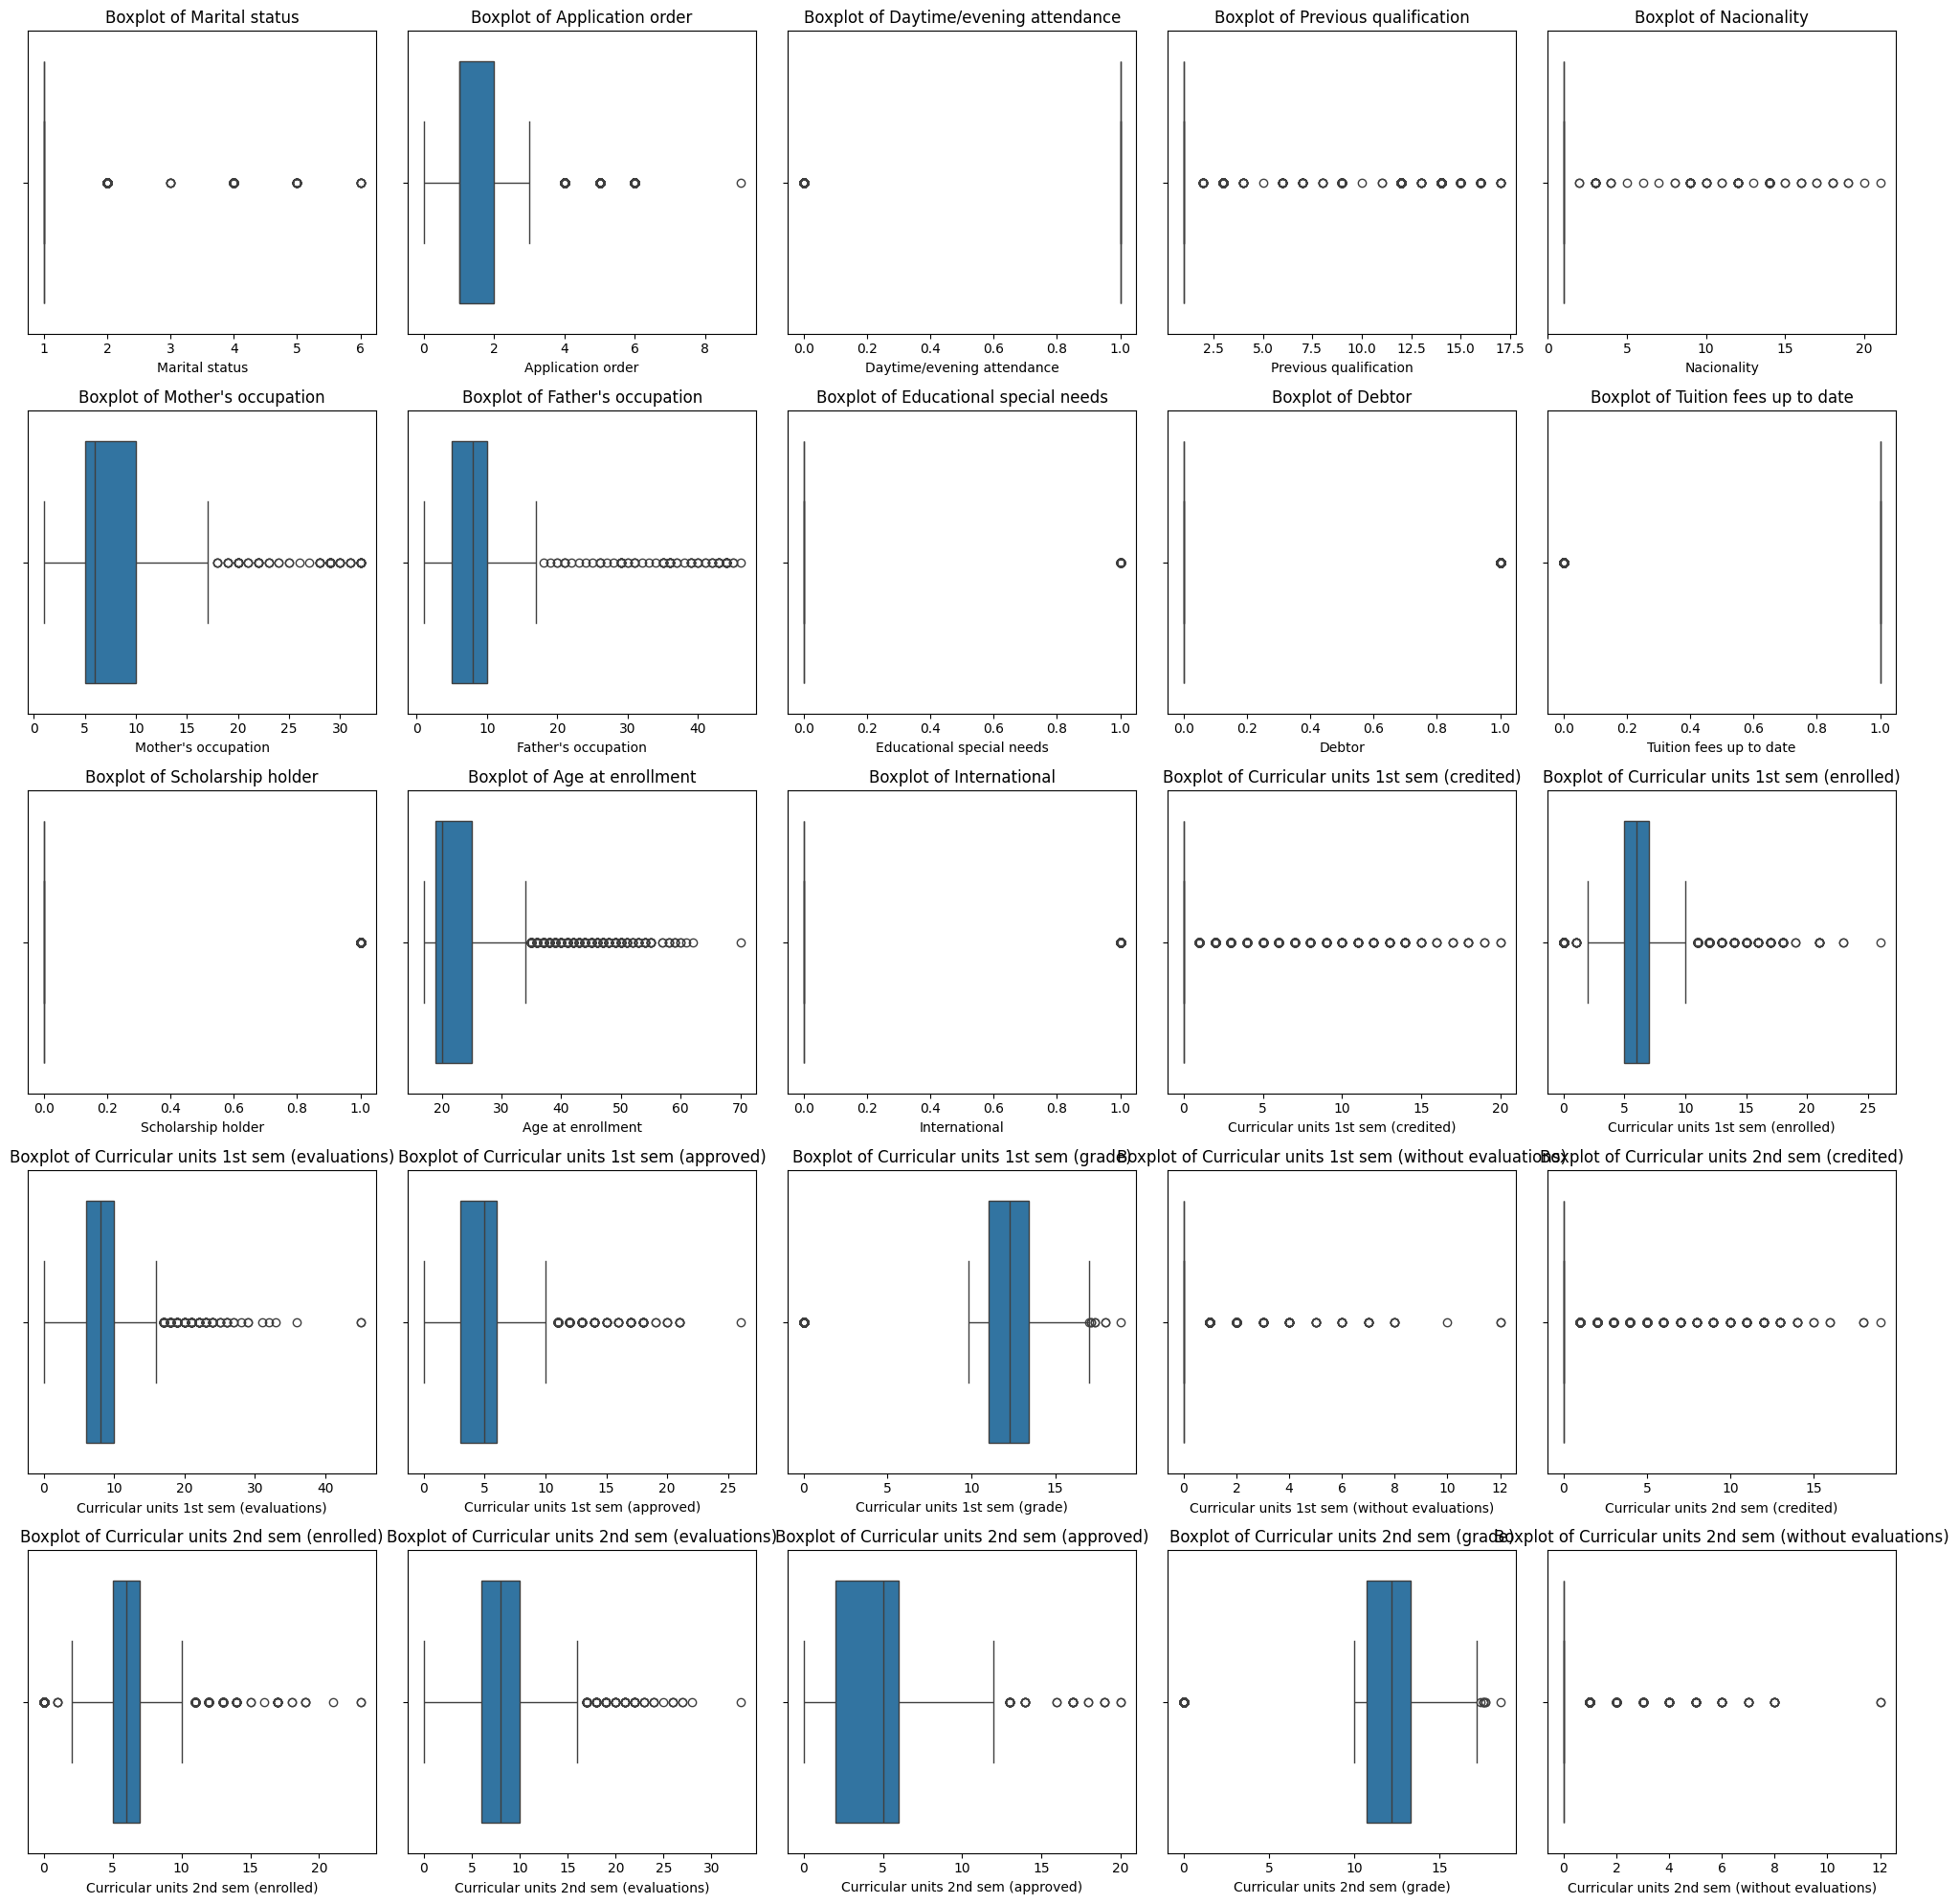

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Load your data
data = pd.read_csv('../../data/student-graduation/graduation_dataset.csv')

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number', 'float64'])
numeric_data = numeric_data.dropna(axis=1, how='all')

# Function to detect outliers
def detect_outliers(df):
    outliers = {}
    
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outlier_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
        if outlier_mask.sum() > 0:
            outliers[column] = df[column][outlier_mask]
            print(f"{column}: {outlier_mask.sum()} outliers detected")
    
    return outliers

# Detect outliers
outliers = detect_outliers(numeric_data)

# Set up the figure with rows of 5 plots
num_columns = len(outliers.keys())
num_rows = math.ceil(num_columns / 5)  # Calculate the required number of rows
fig, axs = plt.subplots(num_rows, 5, figsize=(20, 4 * num_rows))  # Adjust the figure size
axs = axs.flatten()  # Flatten the axes array for easy indexing

# Plot each boxplot for columns with detected outliers
for plot_index, column in enumerate(outliers.keys()):
    sns.boxplot(x=numeric_data[column].dropna(), ax=axs[plot_index])
    axs[plot_index].set_title(f'Boxplot of {column}', fontsize=12)

# Hide any unused subplots
for i in range(plot_index + 1, len(axs)):
    axs[i].axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def cap_outliers(df, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = df.quantile(lower_percentile)
    upper_bound = df.quantile(upper_percentile)
    # Clip values to the percentile bounds
    df_capped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)
    return df_capped

def log_transform(df):
    df_log_transformed = df.apply(lambda x: np.log1p(x))
    return df_log_transformed

def transform_columns(df, columns_to_cap, columns_to_log_transform):
    df_transformed = df.copy()
    
    if columns_to_cap:
        df_transformed[columns_to_cap] = cap_outliers(df[columns_to_cap])
    
    if columns_to_log_transform:
        df_transformed[columns_to_log_transform] = log_transform(df[columns_to_log_transform])
    
    return df_transformed


columns_to_log_transform = [
    'Marital status', 'Application order', 'Daytime/evening attendance', 'Previous qualification',
    'Nacionality', "Mother's occupation", "Father's occupation", 'Educational special needs', 
    'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'Age at enrollment', 
    'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (grade)', 
    'Curricular units 2nd sem (without evaluations)'
]

columns_to_cap = [
    'Application mode', 'Course', "Mother's qualification", "Father's qualification", 
    'Displaced', 'Gender', 'Curricular units 1st sem (evaluations)', 
    'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
    'Unemployment rate', 'Inflation rate', 'GDP'
]

print("Skewness before transformation:")
print(numeric_data[columns_to_log_transform + columns_to_cap].skew())

transformed_data = transform_columns(numeric_data, columns_to_cap, columns_to_log_transform)

print("\nSkewness after transformation:")
print(transformed_data[columns_to_log_transform + columns_to_cap].skew())


Skewness before transformation:
Marital status                                    4.399764
Application order                                 1.881050
Daytime/evening attendance                       -2.507238
Previous qualification                            2.405934
Nacionality                                       7.282730
Mother's occupation                               2.231227
Father's occupation                               4.058407
Educational special needs                         9.154976
Debtor                                            2.434652
Tuition fees up to date                          -2.349054
Scholarship holder                                1.164871
Age at enrollment                                 2.054988
International                                     6.104830
Curricular units 1st sem (credited)               4.169049
Curricular units 1st sem (enrolled)               1.619041
Curricular units 1st sem (grade)                 -1.568146
Curricular units 1st sem

In [18]:
import pandas as pd

# Load your data
data = pd.read_csv('../../data/student-graduation/graduation_dataset.csv')

# Feature extraction
data['Total Credits'] = data['Curricular units 1st sem (credited)'] + data['Curricular units 2nd sem (credited)']
data['Total Enrolled Units'] = data['Curricular units 1st sem (enrolled)'] + data['Curricular units 2nd sem (enrolled)']
data['Total Approved Units'] = data['Curricular units 1st sem (approved)'] + data['Curricular units 2nd sem (approved)']

# Calculate average grades for students who have grades available
data['Average Grade'] = data[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].mean(axis=1)

# Binary features for key indicators
data['Is International Student'] = data['International'].apply(lambda x: 1 if x == 1 else 0)
data['Is Debtor'] = data['Debtor'].apply(lambda x: 1 if x == 1 else 0)
data['Has Scholarship'] = data['Scholarship holder'].apply(lambda x: 1 if x == 1 else 0)

# Display the new features
new_features = ['Total Credits', 'Total Enrolled Units', 'Total Approved Units', 
                'Average Grade', 'Is International Student', 'Is Debtor', 'Has Scholarship']

print("Extracted Features:")
print(data[new_features].head())


Extracted Features:
   Total Credits  Total Enrolled Units  Total Approved Units  Average Grade  \
0              0                     0                     0       0.000000   
1              0                    12                    12      13.833333   
2              0                    12                     0       0.000000   
3              0                    12                    11      12.914286   
4              0                    12                    11      12.666667   

   Is International Student  Is Debtor  Has Scholarship  
0                         0          0                0  
1                         0          0                0  
2                         0          0                0  
3                         0          0                0  
4                         0          0                0  


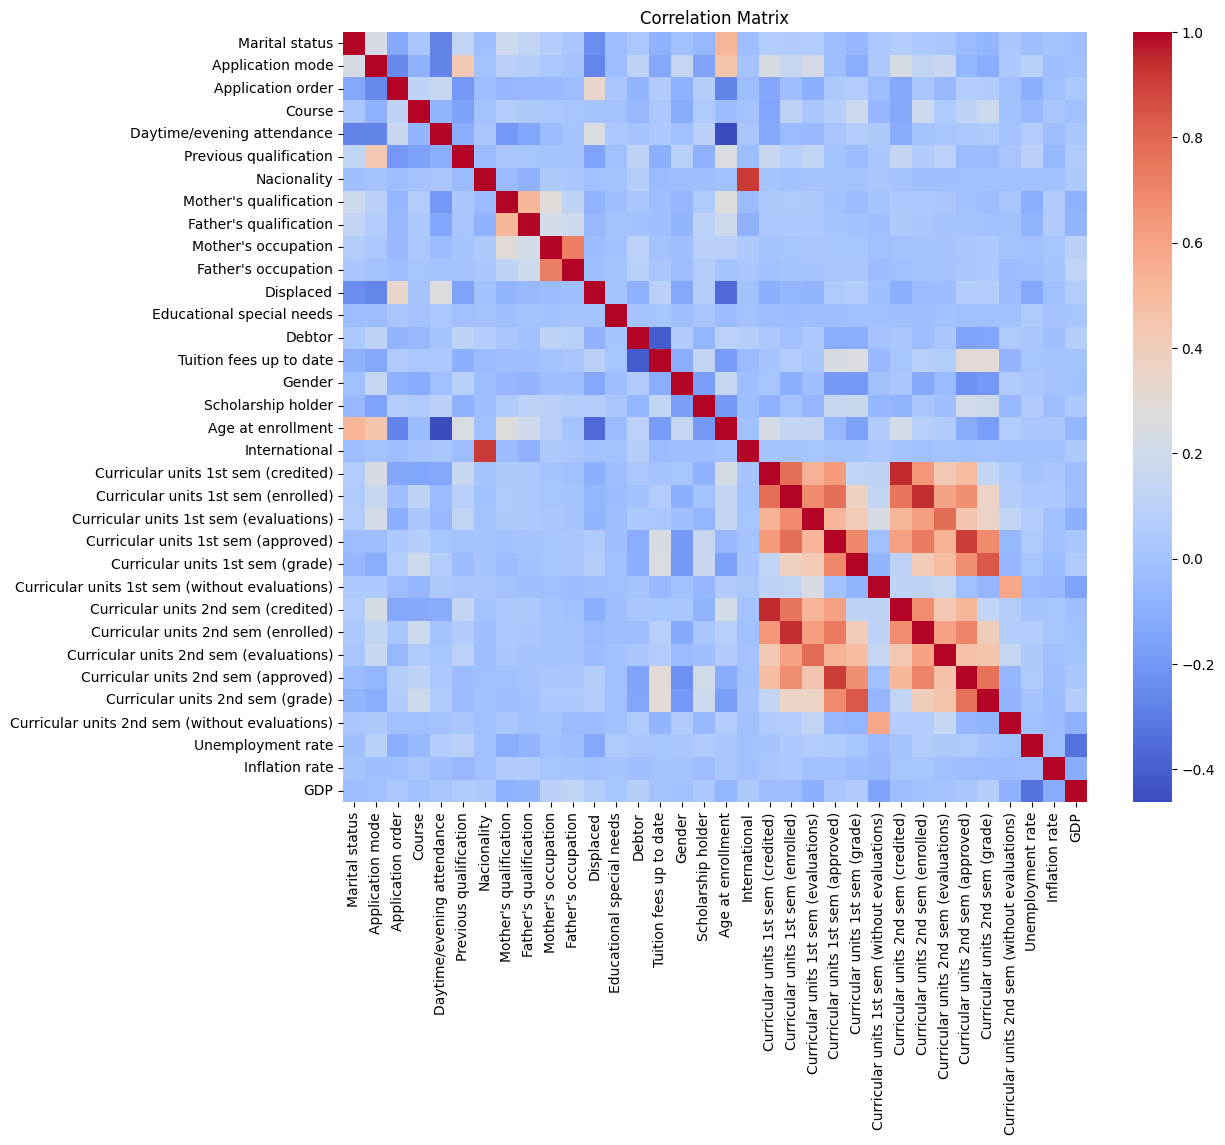

Dropped highly correlated features: []
Top selected features (Univariate Selection): Index(['Application mode', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'],
      dtype='object')
Top features based on Random Forest importance:
                                   Feature  Importance
28     Curricular units 2nd sem (approved)    0.139524
29        Curricular units 2nd sem (grade)    0.108936
22     Curricular units 1st sem (approved)    0.093029
23        Curricular units 1st sem (grade)    0.074309
27  Curricular units 2nd sem (evaluations)    0.048938
17                       Age at enrollment    0.042033
21  Curricular units 1st sem (evaluations)    0.039941
14                 Tuition fees up to date    0.038683
3                                   Course    0

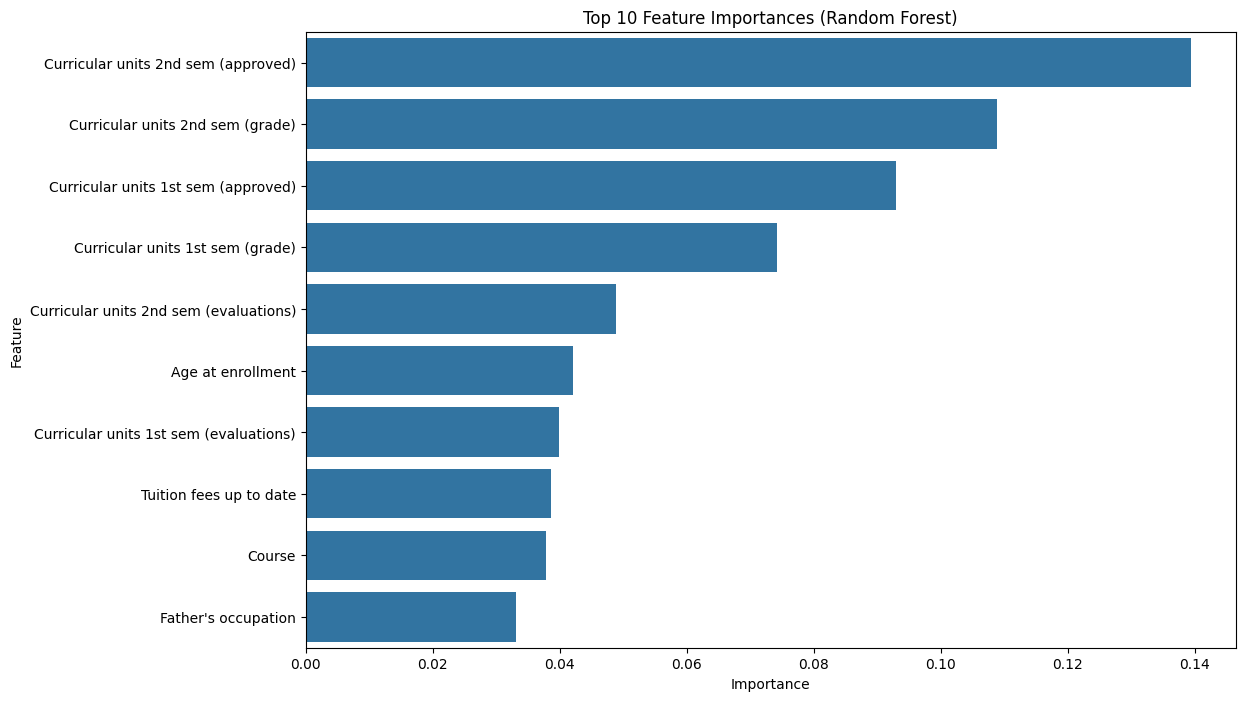

Number of components explaining 78% of the variance: 2
Cumulative explained variance with selected components: 1.00


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,6.929830,-14.630792,2.588903,1.586110,0.682232,-0.019738,0.479989,0.106842,-0.325864,0.084776
1,-6.400839,1.926394,0.990603,-0.434628,-0.112299,0.055164,0.844427,-0.125811,0.559033,-0.743367
2,3.721459,-16.870410,-3.292210,1.770483,0.690016,-0.128486,0.591931,-0.031179,0.383850,-0.637595
3,-4.122742,1.699481,2.364488,-0.535454,-0.669165,-0.411293,-0.212742,-0.351779,-0.185905,-0.008009
4,16.166668,14.957812,-4.794142,-0.989158,1.230975,1.012594,-0.328943,-0.256731,-0.230831,0.032743


In [26]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../../data/student-graduation/graduation_dataset.csv')

# Assuming 'Target_Graduate' is the target column for prediction
X = data.drop(columns=['Target'])
y = data['Target']

# 1. Correlation Analysis to Drop Highly Correlated Features
correlation_matrix = X.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Find highly correlated features (correlation coefficient > 0.8)
high_corr_features = [column for column in correlation_matrix.columns if any(abs(correlation_matrix[column]) > 0.8) and column != correlation_matrix.columns[correlation_matrix.columns.get_loc(column)]]

# Drop highly correlated features
X = X.drop(columns=high_corr_features)
print("Dropped highly correlated features:", high_corr_features)

# 2. Univariate Feature Selection
# Use SelectKBest with ANOVA F-test to select the top k features
k = 10  # Select top 10 features, adjust as needed
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support(indices=True)]
print("Top selected features (Univariate Selection):", selected_features)

# 3. Feature Importance from Random Forest
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display top features by importance
print("Top features based on Random Forest importance:")
print(feature_importances.head(10))

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

# 4. Dimensionality Reduction with PCA (Retain 78% Variance)
# Apply PCA on the selected features after feature selection
pca = PCA(n_components=10)  # Retain 78% of variance
X_pca = pca.fit_transform(X_selected)

# Creating final DataFrame with reduced features
X_pca_df = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

# Calculate and print cumulative explained variance to confirm the threshold
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= 0.78) + 1
print(f"Number of components explaining 78% of the variance: {n_components}")
print(f"Cumulative explained variance with selected components: {cumulative_variance[-1]:.2f}")

X_pca_df.head()


In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd

# Load the dataset
file_path = '../../data/student-graduation/graduation_dataset.csv'
data = pd.read_csv(file_path)

# Separate the features and target variable
X = data.drop(columns=['Target'])
y = data['Target']

# Define numerical and categorical features
numerical_features = ['Unemployment rate', 'Inflation rate', 'GDP']
categorical_features = ['Marital status', 'Application mode', 'Daytime/evening attendance', 'Nacionality', 
                        'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation']

# Imputers for numerical and categorical data
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Standardization of Numerical Features
scaler = StandardScaler()

# Encoding Categorical Variables
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Constructing preprocessing pipelines for both numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', numerical_imputer),
    ('scaler', scaler)
])

categorical_pipeline = Pipeline([
    ('imputer', categorical_imputer),
    ('encoder', encoder)
])

# Combining both numerical and categorical transformations
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Apply preprocessing to transform the features
X_processed = preprocessor.fit_transform(X)

# Retrieve feature names and create a DataFrame with processed data
encoded_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)
numerical_feature_names = numerical_features
processed_columns = list(numerical_feature_names) + list(encoded_feature_names)
X_processed_df = pd.DataFrame(X_processed, columns=processed_columns, index=X.index)

# Display the first few rows of the preprocessed data
X_processed_df.head()


,Unemployment rate,Inflation rate,GDP,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_2,Application mode_3,...,Mother's occupation_23,Mother's occupation_24,Mother's occupation_25,Mother's occupation_26,Mother's occupation_27,Mother's occupation_28,Mother's occupation_29,Mother's occupation_30,Mother's occupation_31,Mother's occupation_32
0,-0.287638,0.124386,0.765761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.876222,-1.105222,0.347199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.287638,0.124386,0.765761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.813253,-1.466871,-1.375511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.876222,-1.105222,0.347199,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
